<a href="https://colab.research.google.com/github/rafaelacirino/profile/blob/master/An%C3%A1lise_de_Dados_de_Madrid_no_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Análise dos Dados do Airbnb da Cidade de Madrid - Espanha

O [Airbnb](https://www.airbnb.com.br/) é uma empresa voltada ao ramo da hospedagem. Tem sede na Califórnia e é considerada como sendo a **maior empresa de hospedagem** dentro deste ramo e sem possuir um único hotel. Sua especialidade é unir hóspedes (sejam eles viajantes ou não) com proprietários que queiram alugar seus espaços.

Sua proposta é dar ao hóspede uma experiência única, tanto no ato da reserva, quanto na hospedagem em si. Para que tenha o máximo de conforto, são disponoibilizados no site do Airbnb dados do imóvel, classificação do proprietário, referências e avaliações de usuários anteriores relacionadas ao local em oferta e atendimento do proprietário com o hóspede.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste notebook analisaremos dados referentes aos imóveis ofertados para a cidade de Madrid, Espanha, e ver quais resultados teremos após a análise dos dados disponibilizados no [Inside Airbnb](http://insideairbnb.com/get-the-data.html)**.


##Obtenção dos Dados

Todos os dados aqui analisados foram extraídos do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html), site este disponibilizado pelo próprio [Airbnb](https://www.airbnb.com.br/).

Para esta análise exploratória de dados, será baixado o seguinte arquivo:

* [Summary information and metrics for listings in Madrid (good for visualisations)](http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-05-14/visualisations/listings.csv)


In [2]:
#importar pacotes necessários do notebook para análise
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#importar o arquivo listings e armazená-lo em um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/spain/comunidad-de-madrid/madrid/2020-05-14/visualisations/listings.csv")

##Análise dos Dados

O objetivo desta etapa é dar um maior entendimento de como os dados estão estruturados.

**Dicionário das variáveis do DataFrame**

* **`id`** - número de id gerado para identificar o imóvel;
* **`name`** - nome da propriedade anunciada;
* **`host_id`** - número de id do proprietário (anfitrião) da propriedade;
* **`host_name`** - nome do anfitrião;
* **`neighbourhood_group`** - esta coluna não contém nenhum valor válido
* **`neighbourhood`** - nome do bairro
* **`latitude`** - coordenada da latitude da propriedade
* **`longitude`** - coordenada da longitude da propriedade
* **`room_type`** - informa o tipo de quarto que é oferecido
* **`price`** - preço para alugar o imóvel
* **`minimum_nights`** - quantidade mínima de noites para reservar
* **`number_of_reviews`** - número de reviews que a propriedade possui
* **`last_review`** - data do último review
* **`reviews_per_month`** - quantidade de reviews por mês
* **`calculated_host_listings_count`** - quantidade de imóveis do mesmo anfitrião
* **`availability_365`** - número de dias de disponibilidade dentro de 365 dias.

Antes de iniciarmos nossa análise, vamos verificar como é composto o *DataSet* mostrando as 5 primeiras entradas.

In [4]:
#mostrando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,6369,"Rooftop terrace room , ensuite bathroom",13660,Simon,Chamartín,Hispanoamérica,40.45724,-3.67688,Private room,70,1,75,2020-02-29,0.61,1,90
1,21853,Bright and airy room,83531,Abdel,Latina,Cármenes,40.40341,-3.74084,Private room,30,4,33,2018-07-15,0.48,2,0
2,23001,Apartmento Arganzuela- Madrid Rio,82175,Jesus,Arganzuela,Legazpi,40.38695,-3.69304,Entire home/apt,50,15,0,NaN,NaN,7,365
3,24836,"Select the Madrid more ""cool"".",101653,Tenty,Centro,Justicia,40.41995,-3.69764,Entire home/apt,115,3,68,2020-01-26,0.62,1,1
4,26825,Single Room whith private Bathroom,114340,Agustina,Arganzuela,Legazpi,40.38985,-3.69011,Private room,25,2,149,2020-03-12,1.22,1,332


## A seguir, vamos responder algumas questões.

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos de variáveis?**

Prosseguiremos em identificar a quantidade de entradas que o conjunto de dados possui e visualizar os tipos de cada coluna.

Este *dataset* que foi baixado é a versão sumarizada do *Airbnb*. Na mesma [página](http://insideairbnb.com/get-the-data.html) que foi feito o download do arquivo encontra-se uma versão completa da cidade de Madrid.

In [5]:
#identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}".format(df.shape[1]))


Entradas:	21739
Variáveis:	16


In [6]:
#verificar as 5 primeiras entradas do dataset
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um *dataset* tem sua relação direta com a quantidade de valores ausentes. Por isso, é importante que saibamos desde o início da análise se a quantidade desses valores é significativa se compararmos com o total de entradas.

Observações:

* É possível observar que a coluna `neighbourhood_group` possui 100% de seus valores faltantes;
* As seguntes variáveis `reviews_per_month` e `last_review` possuem valores nulos em quase metade das linhas;
* As variáveis `name` e `host_name` tem aproximadamente 0,1% dos valores nulos.

In [7]:
#ordenar as variáveis em ordem decrescente pela presença de seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending = False)

reviews_per_month                 0.232991
last_review                       0.232991
host_name                         0.000138
name                              0.000138
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**

Para realizar esta identificação de distribuição das variáveis, será feita uma plotagem do histograma.

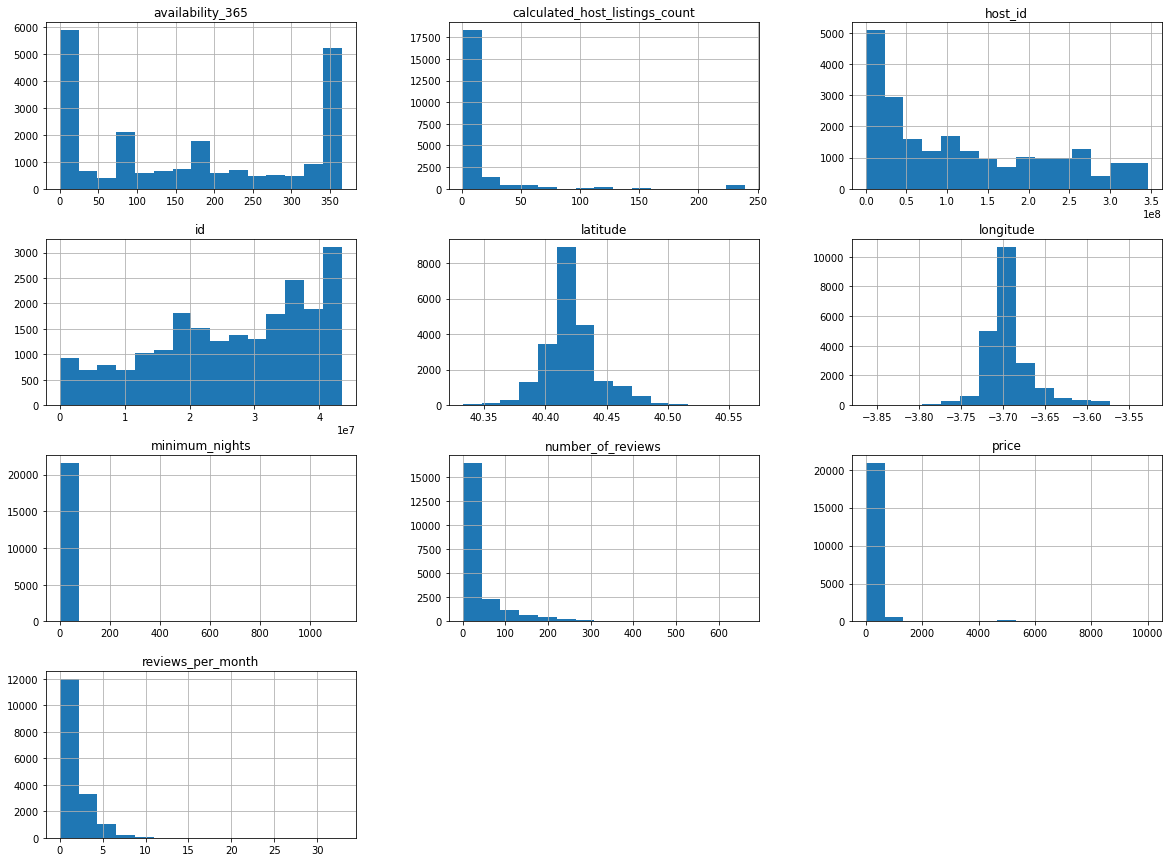

In [8]:
#plotando o histograma das variáveis numéricas
df.hist(bins = 15, figsize = (20, 15));

### **Pode-se verificar a presença de *outliers*?**

Pela distribuição do histograma é possível verificar indícios da presença de *outliers*. Atente-se, por exemplo, às variáveis calculated_host_listings_count, minimum_nights number_of_reviews e price.

Os valores não seguem uma distribuição e distorcem toda a representação gráfica. Para confirmação, há duas maneiras que auxiliam a detecção de *outliers*, são elas:

* Resumo estatístico utilizando o método `describe()`;
* Plotar os `bloxplots` para a variável.


*Observação*:
* *Outliers* são dados que se diferenciam drasticamente dos demais, ou seja, são ponstos 'fora da curva'. Melhor dizendo, outlier é uma valor atípico e que pode(ou poderá) causar anomalias nos resultados obtidos na análise.  

In [9]:
#mostrar o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews','reviews_per_month' ,'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,21739.000000,21739.000000,21739.000000,16674.000000,21739.000000,21739.000000
mean,165.105387,5.312894,36.998298,1.630527,14.638070,170.737338
std,554.708399,25.299401,66.826552,1.733532,39.763124,141.622838
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,39.000000,1.000000,1.000000,0.340000,1.000000,5.000000
50%,64.000000,2.000000,8.000000,1.000000,2.000000,166.000000
75%,100.000000,3.000000,42.000000,2.420000,7.000000,335.000000
max,9999.000000,1125.000000,661.000000,32.840000,239.000000,365.000000


Analisando o resultado acim, pode-se extrair algumas informações:

* A variável `price` possui 75% do valor abaixo de 100, contudo, seu valor máximo é de 9999.
* A quantidade mínima de noites (`minimum_nights`) está acima de 365 dias no ano.

####Abaixo, plotaremos um bloxplot para minimum_nights

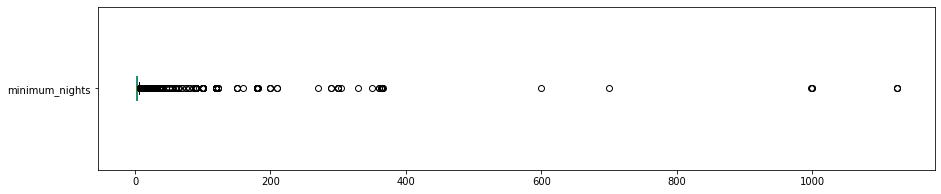

Minimum_nights 
Valores acima de 30: 255 entradas
Em porcentagem: 1.1730%


In [10]:
#minimum_nights
df.minimum_nights.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

#ver a quantidade de valores acima de 30 dias para minimum_night
print("Minimum_nights \nValores acima de 30: {} entradas" .format(len(df[df.minimum_nights > 30])))
print("Em porcentagem: {:.4f}%" .format((len(df[df.minimum_nights > 30]) / df.shape[0]) * 100))


####Boxplot para a variável price

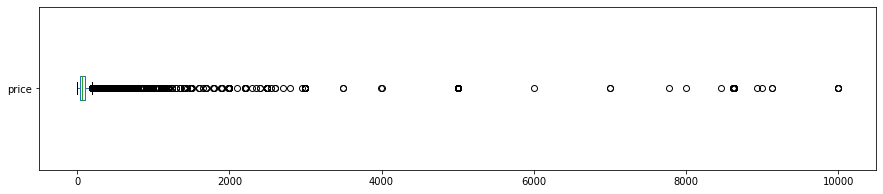

Price 
Valores acima de 1500: 267 entradas
Em porcentage: 1.2282%


In [11]:
#price
df.price.plot(kind = 'box', vert = False, figsize = (15, 3))
plt.show()

#Para mostrar a quantidade de valores acima de 1500 para price 
print("Price \nValores acima de 1500: {} entradas" .format(len(df[df.price > 1500])))
print("Em porcentage: {:.4f}%" .format((len(df[df.price > 1500]) / df.shape[0]) * 100))

####Histogramas sem *outliers*

Após identificarmos *outliers* nas variáveis `price` e `minimum_nights`, agora limparemos o *DataFrame* delas e plotaremos novamente o histograma.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


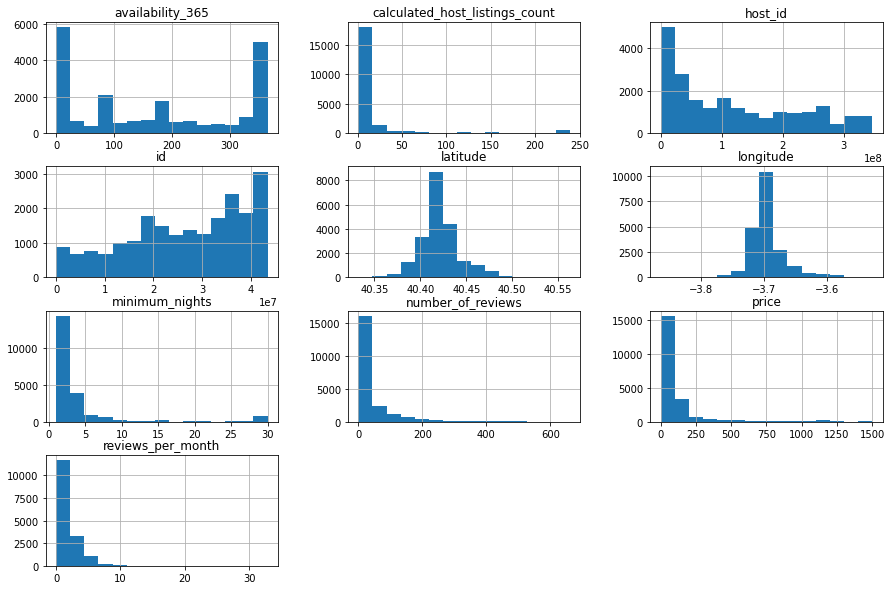

In [12]:
#remover os *outliers* resultando na formação de um novo DataFrame
df.clean = df.copy()
df.clean.drop(df.clean[df.clean.price > 1500].index, axis = 0, inplace = True)
df.clean.drop(df.clean[df.clean.minimum_nights > 30].index, axis = 0, inplace = True)

#plotar o histograma para as variáveis numéricas
df.clean.hist(bins = 15, figsize = (15, 10));


### **Q4. Qual a correlação existente entra as variáveis?**

**Correlação** é o grau de associação ou relacionamento entre variáveis, ou seja, na correlação interessa saber se as variáveis são independentes ou variam juntas. No contexto analisado, interessa saber se há relação ou semelhança entre duas variáveis.

Esta medida de correlação é analisada em funço do coeficiente de correlação, o qual estabelece a intensidade ou grau da correlação. Portanto, o que será feito neste momento é:

* Criar uma matriz de correlação;
* Gerar um *heatmap* (ou mapa de calor) a partir da matriz gerada usando a biblioteca `seaborn`.

In [13]:
#criando uma matriz de correlação
corr = df.clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.068927,-0.118743,-0.081047,0.129858,0.063112
minimum_nights,-0.068927,1.000000,-0.084770,-0.109864,0.273018,0.116549
number_of_reviews,-0.118743,-0.084770,1.000000,0.768815,-0.083055,0.062036
reviews_per_month,-0.081047,-0.109864,0.768815,1.000000,-0.080013,0.058610
calculated_host_listings_count,0.129858,0.273018,-0.083055,-0.080013,1.000000,0.125356
availability_365,0.063112,0.116549,0.062036,0.058610,0.125356,1.000000


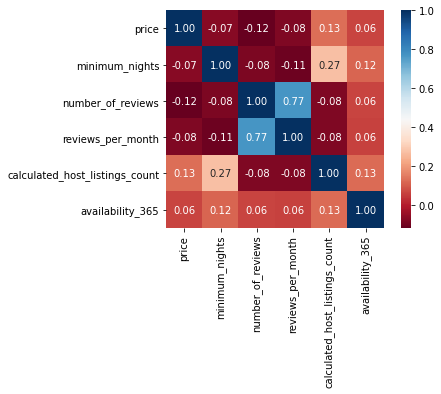

In [14]:
#gerar um heatmap
sns.heatmap(corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está sendo anunciada no Airbnb. Se você já utilizou o site, sabe que há acomodações do tipo inteiras (alugar o apartamento/casa inteiro), um quarto naquela acomodação ou mesmo compartilhar um quarto com outras pessoas.

Agora analisaremos a quantidade de ocorrências para cada tipo de operação usando o método `value_counts()`.

In [15]:
#mostrar a quantidade de cada tipo de imóvel disponível
df.clean.room_type.value_counts()

Entire home/apt    12964
Private room        7691
Shared room          326
Hotel room           237
Name: room_type, dtype: int64

In [16]:
#mostar em porcentagem a disponibilidade de cada tipo de imóvel
df.clean.room_type.value_counts() / df.clean.shape[0] 

Entire home/apt    0.610991
Private room       0.362475
Shared room        0.015364
Hotel room         0.011170
Name: room_type, dtype: float64

### **Q6. Qual a localidade/bairro mais caro de Madrid?**

Uma maneira de se aferir uma variável em função de outra é utilizando a função `groupby()`. No caso, queremos comparar os bairros tendo como referência o preço de locação.

In [17]:
df.clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending = False)[:35]

neighbourhood_group
San Blas - Canillejas    246.504892
Usera                    201.474164
Vicálvaro                158.365079
Tetuán                   144.874863
Barajas                  125.267045
Hortaleza                124.760108
Salamanca                123.570423
Chamartín                120.622103
Chamberí                 120.553478
Latina                   113.557057
Centro                   109.252704
Fuencarral - El Pardo    100.006579
Moncloa - Aravaca         98.741667
Moratalaz                 94.816000
Ciudad Lineal             92.514158
Retiro                    92.155425
Villa de Vallecas         88.915789
Arganzuela                79.610825
Carabanchel               65.320755
Villaverde                61.261628
Puente de Vallecas        59.302711
Name: price, dtype: float64

Acima, podemos ter a presença de bairros como Vicálvaro, Usera e Barajas estão com a média de preços superior a bairros como Retiro, Centro e Salamanca.
Um conhecimento mínimo dos bairros de Madrid, já se sabe que Barajas não tem valores superiores ao bairro do Retiro. Portanto, extrair dados, também significa estar atrelado ao conhecimento do que se quer extrair.
Vamos analisar, a título de curiosidade, quantas entradas há nos 3 primeiros bairros (Vicálvaro, Usera e Barajas).

In [18]:
#ver a quantidade de imóveis
print(df.clean[df.clean.neighbourhood_group == 'Usera'].shape)

(329, 16)


In [19]:
print(df.clean[df.clean.neighbourhood_group == 'Vicálvaro'].shape)

(63, 16)


In [20]:
print(df.clean[df.clean.neighbourhood_group == 'Barajas'].shape)

(176, 16)


In [21]:
#ver as 5 primeiro entradas de Vicálvaro
df.clean[df.clean.neighbourhood_group == 'Vicálvaro'].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
575,1289823,Disinfected - Octavio's modern loft! 2 bathrooms,142989,Octavio,Vicálvaro,Casco Histórico de Vicálvaro,40.40209,-3.60533,Entire home/apt,39,2,140,2020-03-08,1.71,1,343
2096,7480642,Spectacular Apartment in Madrid,39173356,Carmen Iris,Vicálvaro,Casco Histórico de Vicálvaro,40.39586,-3.58537,Entire home/apt,185,7,0,NaN,NaN,1,363
2732,9951292,House on Madrid\nRooms in Madrid\nCasa en madrid,51138942,Daniel Oscar,Vicálvaro,Ambroz,40.40573,-3.61643,Private room,30,1,0,NaN,NaN,2,365
3150,11708403,Alquiler de Habitación por día.,62239322,Wanda,Vicálvaro,Ambroz,40.40550,-3.60255,Private room,30,1,0,NaN,NaN,1,0
3161,11748751,ROOM JUST PERFECT AT HOME. ALL BILLS INCLUDED!,29617574,Azahara,Vicálvaro,Casco Histórico de Vicálvaro,40.40268,-3.61207,Private room,19,6,14,2020-02-28,0.28,2,242


Por serem fornecidas as Latitudes e Longitudes dos imóveis é possível plotar cada ponto. Para isso, considera-se `x = longitude` e `y = latitude`.

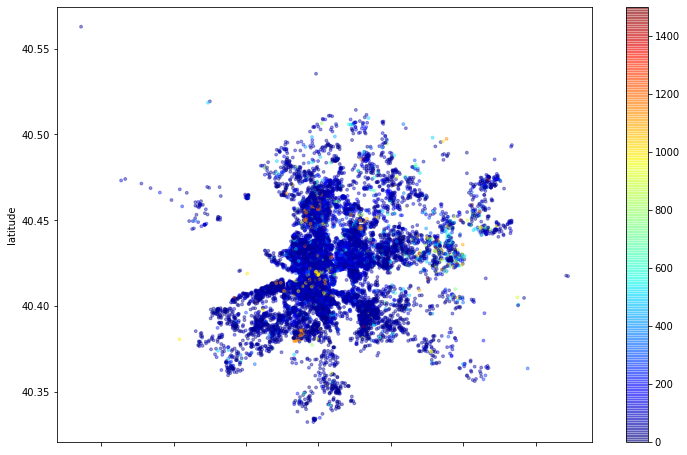

In [22]:
#plotar os imóveis pela latitudexlongitude
df.clean.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4, c = df.clean['price'], s = 8, cmap = plt.get_cmap("jet"), figsize = (12, 8));

## Conclusões

Esta foi uma pequena análise extraída dos dados disponibilizados pelo Airbnb, com isso, já pudemos perceber a presença de *outliers* em algumas variáveis.

Foi possível perceber também que em algumas localidades por ter poucos imóveis há distorção estatística de alguns atributos.

Concluindo, ressalta-se que este *dataset* é uma versão resumida e deve servir apenas como abordagem inicial. Em próxima análise exploratória recomenda-se usar o conjunto de dados completos.